# Arbol de decision para regresion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

## se crea el modelo

In [4]:
colNames = data.columns.values.tolist()
colPredictoras = colNames[:13]
colObjetivo = colNames[13]
X = data[colPredictoras]
Y = data[colObjetivo]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
tree = DecisionTreeRegressor(min_samples_split=30, max_depth=5, min_samples_leaf=10, random_state=0)
tree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [7]:
data["prediccion"] = tree.predict(data[colPredictoras])

In [8]:
data["diferencia"] = np.sqrt((data["medv"] - data["prediccion"])**2)

In [9]:
data[["medv","prediccion","diferencia"]]

,medv,prediccion,diferencia
0,24.0,23.787500,0.212500
1,21.6,23.787500,2.187500
2,34.7,35.247826,0.547826
3,33.4,35.247826,1.847826
4,36.2,35.247826,0.952174
5,28.7,23.787500,4.912500
6,22.9,21.863636,1.036364
7,27.1,20.020833,7.079167
8,16.5,20.020833,3.520833
9,18.9,20.020833,1.120833


## representacion grafica del arbol

In [10]:
from sklearn.tree import export_graphviz

In [11]:
with open("boston_arbolregresion.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=colPredictoras)
    dotfile.close()

In [12]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [13]:
from graphviz import Source

In [14]:
file = open("boston_arbolregresion.dot", "r")
text = file.read()

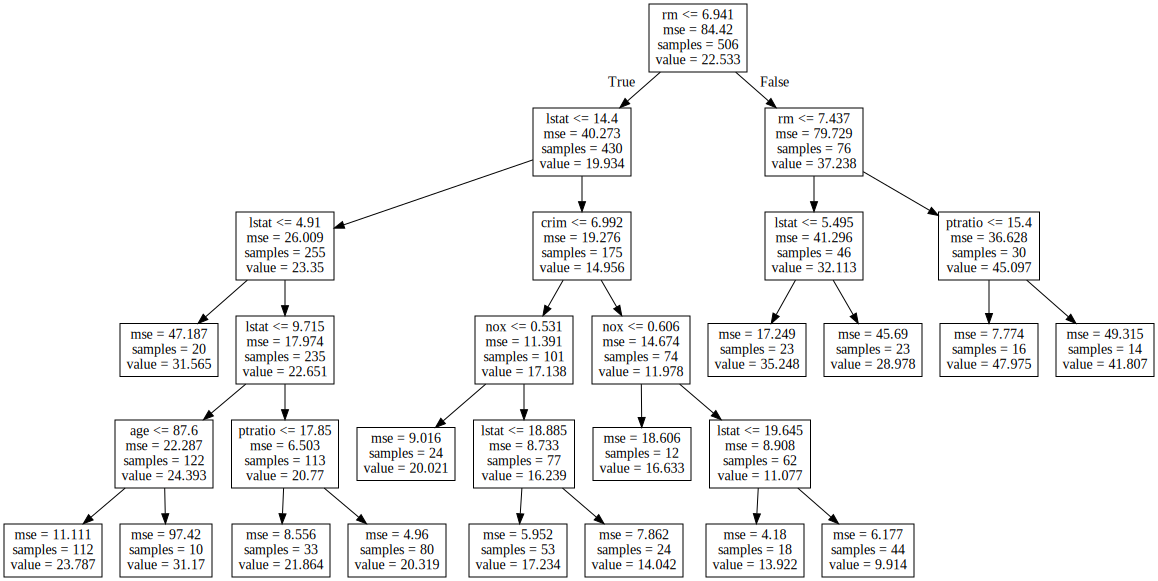

In [15]:
Source(text)

## validacion cruzada para escoger el max_depth correcto (es decir hacer la poda correcta)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [17]:
for i in range(1,11):
    tree = DecisionTreeRegressor(min_samples_split=30, max_depth=i, min_samples_leaf=10, random_state=0)
    tree.fit(X,Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(tree,X,Y,scoring="neg_mean_squared_error", cv=cv, n_jobs=1))
    print("score para i = ",i, "es de ",score)

score para i =  1 es de  -54.64005096884788
score para i =  2 es de  -29.560344516775093
score para i =  3 es de  -23.929017292685447
score para i =  4 es de  -22.335323294283935
score para i =  5 es de  -20.54926189262014
score para i =  6 es de  -20.110616775207475
score para i =  7 es de  -20.068113350080786
score para i =  8 es de  -20.123136845099417
score para i =  9 es de  -20.11405771239422
score para i =  10 es de  -20.107307036443846


### * esto significa que el score mas alto se obtiene con max_depth=7, por lo tanto a la hora de crear el modelo con max_depth=5 como hicimos es mejor colocar max_depth=7

In [18]:
list(zip(colPredictoras,tree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

## las columnas mas importantes para el modelo son "rm" y "lstat"

# Random Forest (para regresion)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
forest = RandomForestRegressor(n_jobs=1, oob_score=True, n_estimators=300) ##n_jobs= cantidad de tareas simultaneas para ejecutar el algoritmo; oob_score=True sirve para obtener luego el score del bosque;  n_estimators= es el numero de arboles que va a tener el bosque.
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [67]:
data["randomForest_prediccion"] = forest.oob_prediction_ ## se ejecuta la prediccion
data[["medv", "randomForest_prediccion"]] ## comparacion de valores reales vs la prediccion realizada

,medv,randomForest_prediccion
0,24.0,28.726230
1,21.6,22.308929
2,34.7,34.867925
3,33.4,34.361864
4,36.2,34.539130
5,28.7,24.171560
6,22.9,20.330357
7,27.1,17.132353
8,16.5,17.391176
9,18.9,20.042982


In [68]:
## calculo del error del bosque
data["randomForest_error"] = (data["medv"] - data["randomForest_prediccion"])**2
sum(data["randomForest_error"])/len(data)

10.129085083981089

In [69]:
## el score del bosque
forest.oob_score_

0.8800149450532108